# Kaggle Challenge
Kaggle의 PlayGrounds Series에 참가해보려고 한다. Season 4-1은 Bianry Classification with a Bank Churn Dataset 문제이다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('C:/Users/USER/Desktop/personal_project/Kaggle_Bank_Churn_Prediction/train.csv')
test_df = pd.read_csv('C:/Users/USER/Desktop/personal_project/Kaggle_Bank_Churn_Prediction/test.csv')

In [2]:
train_df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


not null set이므로, 결측치에 대한 처리는 고려하지 않는다.

이번 문제는, train은 Exited는 binary로 주어지나, test는 Exited가 나올 확률을 예측하는 것이 목적이다.

## Feature 설명

- Id : 컬럼 구분 id
- CustomerId : 고객번호
- Surname : 성씨
- Credit Score : 신용점수. 높을수록 대출을 받기 좋은 상황
- Geography : 지역
- Gender : 성별
- Age : 나이
- Tenure : 몇년동안 은행서비스, 계좌서비스 등을 이용했는가?
- Balance : 은행 잔고
- NumOfProducts : 소지한 주요 상품 수
- HasCrCard: 신용 카드를 가지고 있는가?
- IsActivenumber : 신용카드가 유효한가?
- EstimatedSalary : 추정 급여

## EDA

In [6]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


아무리 생각해도 id, 고객id, 이름에 따라서 뭐가 달라질거 같지는 않다.

### creditscore

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

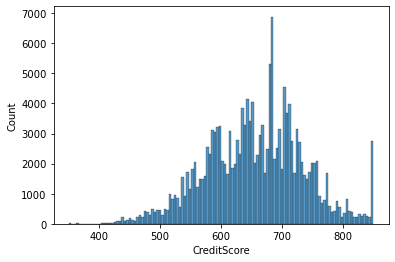

In [8]:
sns.histplot(train_df['CreditScore'])

600~700사이에서 다수가 분포해있다. 800 이상의 고신용이나 500 이하의 저신용은 드물다. 
통계적 확인은 필요하겠으나, 정규분포에 나쁘지 않게 분포했을 것이다. 다만, 신용점수는 "절대평가"임을 고려해야한다.

In [10]:
train_df['CreditScore'].describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

최소 350점 ~ 최대 850점의 분포이다.
REMARK. kaggle에서 관련 토론 자료를 확인해본 결과 해당 데이터셋의 신용점수 기준이 최하 350, 최대 850이다.

나중에 predict때, 결국 확률을 예측해야 하므로, 적절한 scaler가 필요하다. scaler는 절대평가를 반영, Min-Max로 진행한다.

### geography

In [12]:
train_df['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

단 3개의 지역만이 주어져 있다. 지역의 경우는 국가의 경제 상황에 따라서 대출 허용 빈도 등이 달라질 수 있다.
따라서 국가의 변수를 무시할 수만은 없을 것이다.

### Gender

In [14]:
train_df['Gender'].value_counts()

Male      93150
Female    71884
Name: Gender, dtype: int64

Gender의 변수는 고려 여부 자체를 결정해야 할 것 같다.

### Age

우선, info에서 Age에 이상 현상이 발견된 것으로 추정된다. 그 이유가, Age는 정수형이어야 하는데 float으로 인식되고 있다.

In [17]:
# 정수형이 아닌 것이 있는지 체크
for x in train_df['Age']:
    if x-round(x) != 0:
        print(x)

36.44
32.34


정수형 변수가 아닌 것이 발견되어, 이에 대한 전처리가 반드시 필요하다.! 반올림으로 처리하자.

### Tenure

정수형으로 나타나고 있다.

In [18]:
train_df['Tenure'].value_counts()

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

값의 범위가 넓지 않다. 이것도 사용년수이나 클수록 이탈율에 어떤 영향을 미칠지 모르기 때문에, 역시 전처리 전에 관계 분석이 필요

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Count'>

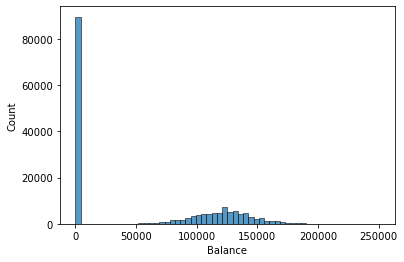

In [19]:
sns.histplot(train_df['Balance'])

잔액은 없는 사람이 더 많은 이상 현상이 보인다. 얼마나 관계성이 있는지 따로 봐야 할듯 하다.

### NumOfProducts

In [20]:
train_df['NumOfProducts'].value_counts()

2    84291
1    77374
3     2894
4      475
Name: NumOfProducts, dtype: int64

주요 상품이 4개 정도로 한정되어 있는것으로 보인다. 

### HasCrCard, isActiveMember

In [22]:
train_df['HasCrCard'].value_counts()

1.0    124428
0.0     40606
Name: HasCrCard, dtype: int64

75% 정도는 카드를 가지고 있다.

In [24]:
train_df['IsActiveMember'].value_counts()

0.0    82885
1.0    82149
Name: IsActiveMember, dtype: int64

카드를 가지고 있는 사람중 60~70% 정도만이 카드가 활성화되어있다.

### EstimatedSalary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

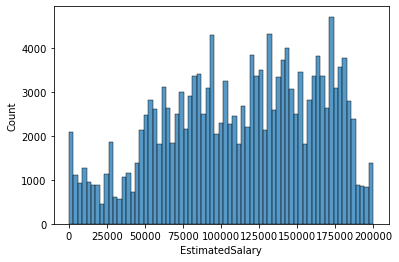

In [25]:
sns.histplot(train_df['EstimatedSalary'])

급여 분포

### Exited

In [26]:
train_df['Exited'].value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

y변수가 불균형하다. 불균형에 대처하는 방법에 대해 고민해야 할 것이다.

## 전처리

이번 문제에서는 결정적으로 "확률" 자체를 예측해야 한다. 따라서, 클래스를 예측하였더라도, 확률값을 돌려줄 수 있는 모델을 생각해야 한다.

분류문제로 풀어도 될 것이고, 회귀 모델로 예측해도 문제가 없을 것이다.
다만 일반적인 트리 모델등을 쓰기는 부적합하므로 회귀 모델 계열을 사용하거나 로지스틱 회귀로 proba을 반환하게 할 수 있다.

In [28]:
train_df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


- id, CustomerId, Surname : drop
- creditScore : Min_max Scaler를 활용하자. (x-350)/500 으로 하면 된다.
- Geography, Gender : One-Hot Encoding
- Age : Min-Max Scaler를 활용하자.
- Tenure : 역시 연차가 높을수록 균일하게 높은 가중치를 주게 Min_Max Scaler
- Num of Products : 동일하게 진행
- Estimated Salary : 평균 연봉과의 차이를 고려하기 위해 이것은 Standard Scaler로 진행
- HasCrCard, IsActiveMember: 그대로 진행

문제는 Balance다. 이것이 얼마나 영향이 있는지를 봐야 할 거 같다.

In [29]:
train_df_nobal = train_df.loc[train_df.Balance == 0]
train_df_nobal['Exited'].value_counts()

0    75156
1    14492
Name: Exited, dtype: int64

In [30]:
train_df_bal = train_df.loc[train_df.Balance != 0]
train_df_bal['Exited'].value_counts()

0    54957
1    20429
Name: Exited, dtype: int64

유의미한 차이를 보이고 있어 사용은 해야 할 것이다. 이 또한 0에 몰려 있어서 min_max scaler로 해야 할 것이다.